In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NG_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,NaN,0.0,0.32,0.00,NaN,0.00,0.0,0.00,...,0.0,0.0,0.000,0.0,NaN,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,NaN,0.0,NaN,0.28,0.21,0.07,0.0,0.94,...,0.0,0.0,0.132,NaN,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,NaN,0.0,NaN,NaN,0.31,0.63,NaN,0.63,...,0.0,NaN,0.135,0.0,0.135,0.000,NaN,3.537,40.0,191.0
3,0.00,0.00,NaN,0.0,1.85,0.00,0.00,NaN,0.0,0.00,...,0.0,0.0,0.223,0.0,NaN,0.000,0.000,NaN,NaN,54.0
4,0.00,0.00,0.00,NaN,1.92,0.00,NaN,0.00,0.0,NaN,...,NaN,0.0,0.054,0.0,0.164,0.054,NaN,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,NaN,0.64,0.0,0.00,NaN,NaN,0.00,0.0,0.00,...,NaN,0.0,0.348,NaN,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,NaN,0.000,0.0,0.000,0.000,0.000,3.043,NaN,NaN
4594,NaN,NaN,0.00,0.0,0.00,NaN,0.00,0.00,0.0,0.00,...,NaN,0.0,0.136,0.0,0.000,NaN,NaN,1.837,12.0,NaN
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.0,0.00,...,0.0,0.0,0.032,0.0,NaN,0.000,0.000,1.189,5.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1110
float64		column 2	936
float64		column 3	696
float64		column 4	820
float64		column 5	754
float64		column 6	936
float64		column 7	754
float64		column 8	870
float64		column 9	870
float64		column 10	754
float64		column 11	928
float64		column 12	696
float64		column 13	1102
float64		column 14	696
float64		column 15	878
float64		column 16	1168
float64		column 17	1168
float64		column 18	936
float64		column 19	994
float64		column 20	812
float64		column 21	762
float64		column 22	1226
float64		column 23	754
float64		column 24	936
float64		column 25	994
float64		column 26	1392
float64		column 27	994
float64		column 28	530
float64		column 29	878
float64		column 30	638
float64		column 31	878
float64		column 32	986
float64		column 33	870
float64		column 34	936
float64		column 35	1110
float64		column 36	936
float64		column 37	870
float64		column 38	754
float64		column 39	870
float64		column 40	986
float64		column 41	870
float64		column 42	10

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,3487.000000,3661.000000,3901.000000,3777.000000,3843.000000,3661.000000,3843.000000,3727.000000,3727.000000,3843.000000,...,3661.000000,3545.000000,3727.000000,3553.000000,3893.000000,3719.000000,3661.000000,3835.000000,3371.000000,3545.000000
mean,0.084646,0.204258,0.276039,0.078973,0.300203,0.085550,0.095126,0.093016,0.077639,0.225894,...,0.027192,0.029001,0.132987,0.012947,0.263251,0.070989,0.031383,4.683225,49.908336,260.919605
std,0.263046,1.289570,0.498306,1.539386,0.651022,0.256229,0.356198,0.386415,0.250836,0.621801,...,0.247076,0.196854,0.260813,0.098970,0.835011,0.241847,0.269816,26.178067,210.373070,488.659233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.611000,7.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.068000,0.000000,0.000000,0.000000,0.000000,2.322000,15.000000,102.000000
75%,0.000000,0.000000,0.400000,0.000000,0.370000,0.000000,0.000000,0.000000,0.000000,0.150000,...,0.000000,0.000000,0.179000,0.000000,0.309000,0.050000,0.000000,3.734500,45.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,3.230000,18.180000,...,8.330000,4.367000,9.752000,4.081000,32.478000,6.003000,13.129000,1021.500000,9989.000000,9090.000000


<AxesSubplot:>

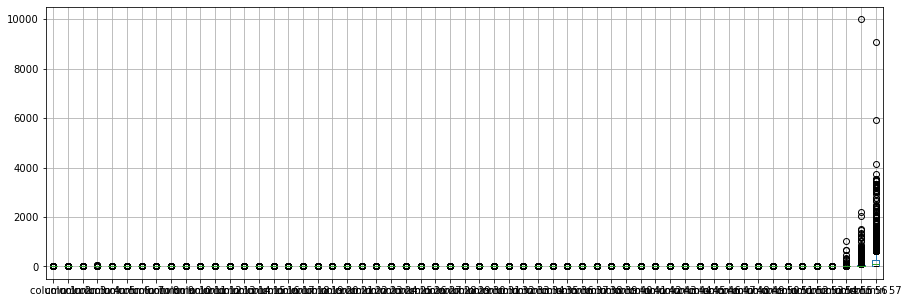

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.084646
column 2       0.204258
column 3       0.276039
column 4       0.078973
column 5       0.300203
column 6       0.085550
column 7       0.095126
column 8       0.093016
column 9       0.077639
column 10      0.225894
column 11      0.052655
column 12      0.530800
column 13      0.079794
column 14      0.048857
column 15      0.041767
column 16      0.228396
column 17      0.123625
column 18      0.163783
column 19      1.650974
column 20      0.067871
column 21      0.790412
column 22      0.094387
column 23      0.085342
column 24      0.074971
column 25      0.494177
column 26      0.198905
column 27      0.676969
column 28      0.111824
column 29      0.085722
column 30      0.090338
column 31      0.051385
column 32      0.038150
column 33      0.078860
column 34      0.034687
column 35      0.081454
column 36      0.080699
column 37      0.112267
column 38      0.012519
column 39      0.069182
column 40      0.051662
column 41      0.042321
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.028123,0.076030,0.002048,0.030174,0.055978,-0.002315,0.010742,0.100315,0.031456,...,-0.000587,-0.023091,-0.000125,-0.027306,0.048052,0.138083,-0.003894,0.054930,0.048350,0.132819
column 2,-0.028123,1.000000,-0.033382,-0.007905,-0.025574,-0.030771,0.002736,-0.014336,-0.001861,0.031669,...,-0.016186,-0.005509,-0.051507,-0.011916,-0.018458,-0.008686,-0.002106,-0.002966,-0.002604,-0.028014
column 3,0.076030,-0.033382,1.000000,-0.025945,0.053175,0.064353,0.044124,0.012375,0.088751,0.032434,...,-0.028127,-0.033779,0.006535,-0.031849,0.084294,0.082667,0.021328,0.100249,0.143605,0.077452
column 4,0.002048,-0.007905,-0.025945,1.000000,-0.003638,-0.016327,0.023668,0.020683,0.001713,-0.005110,...,-0.001481,-0.005069,-0.011581,-0.006202,-0.005177,0.003934,0.004209,0.004027,0.018766,0.031856
column 5,0.030174,-0.025574,0.053175,-0.003638,1.000000,0.068950,0.137411,0.050932,0.023736,0.034012,...,-0.030528,-0.021001,-0.054039,-0.016072,0.034897,0.037177,-0.010970,0.064407,0.037139,0.005092
column 6,0.055978,-0.030771,0.064353,-0.016327,0.068950,1.000000,0.071692,0.064455,0.085998,0.007781,...,-0.031573,-0.006681,-0.012648,0.003408,0.058118,0.127498,0.058571,-0.002500,0.061666,0.101657
column 7,-0.002315,0.002736,0.044124,0.023668,0.137411,0.071692,1.000000,0.042831,0.042059,0.032864,...,-0.028415,-0.033698,-0.044075,-0.016820,0.035774,0.046224,0.029347,0.041274,0.042310,0.004855
column 8,0.010742,-0.014336,0.012375,0.020683,0.050932,0.064455,0.042831,1.000000,0.061033,0.059665,...,-0.014991,-0.019580,-0.033271,-0.014675,0.013818,0.053964,-0.009441,0.012749,0.023177,0.055408
column 9,0.100315,-0.001861,0.088751,0.001713,0.023736,0.085998,0.042059,0.061033,1.000000,0.131046,...,-0.023231,-0.010250,-0.021772,0.009406,0.033227,0.114889,-0.000029,0.141078,0.113938,0.256193
column 10,0.031456,0.031669,0.032434,-0.005110,0.034012,0.007781,0.032864,0.059665,0.131046,1.000000,...,-0.010120,0.027726,0.005150,0.003136,0.028074,0.102368,-0.000555,0.076577,0.056782,0.074696


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+40,17+40+40,17+40+40+40,17+40+40,17+40,17], vae_layer = False, seed = 400)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 452.31391162407107
Epoch: 1 , loss: 449.2987463549039
Epoch: 2 , loss: 450.5670159369811
Epoch: 3 , loss: 452.14407122675135
Epoch: 4 , loss: 449.7343911360365
Epoch: 5 , loss: 450.6359428113346
Epoch: 6 , loss: 447.6253256714718
Epoch: 7 , loss: 446.89809189108604
Epoch: 8 , loss: 448.4178049971418
Epoch: 9 , loss: 448.6957639900234
Epoch: 10 , loss: 446.8402396012682
Epoch: 11 , loss: 417.0251473350392
Epoch: 12 , loss: 375.99902370333257
Epoch: 13 , loss: 363.5007572772196
Epoch: 14 , loss: 348.21764821707166
Epoch: 15 , loss: 343.0174038850472
Epoch: 16 , loss: 332.9048775064821
Epoch: 17 , loss: 338.98629311485155
Epoch: 18 , loss: 329.4159686656779
Epoch: 19 , loss: 319.80275457827474
Epoch: 20 , loss: 322.8992376028453
Epoch: 21 , loss: 323.53482255038483
Epoch: 22 , loss: 320.99357727263447
Epoch: 23 , loss: 324.0955365808999
Epoch: 24 , loss: 331.4753730986592
Epoch: 25 , loss: 327.75741146499

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4      0.000000
column 5      0.000000
column 6      0.000000
column 7      0.109142
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.079803
column 12     0.565835
column 13     0.000000
column 14     0.000000
column 15     0.000000
column 16     0.000000
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.278976
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31    -0.043135
column 32     0.000000
column 33    -0.162769
column 34     0.000000
column 35     0.000000
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41    -0.006151
column 42     0.000000
column 43     0.000000
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.000000,-0.099799,0.000000,0.000000,0.000000,0.173885,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,-0.786618,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,-0.346047,0.000000,0.141602,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,-0.080179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.336589,0.000000,-0.242487,-0.017052,0.000000,0.000000,-0.198467,0.000000,...,0.000000,0.075956,0.0,0.000000,0.000000,0.000000,-0.003752,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.222106,0.000000,0.000000,0.000000,0.000000,-1.684661,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.343490,0.000000,0.000000,-0.289538,12.491194,0.000000
4,0.000000,0.000000,0.000000,0.010202,0.000000,0.000000,-0.002552,0.000000,0.000000,-0.542826,...,-0.032384,0.000000,0.0,0.000000,0.000000,0.000000,-0.008559,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.170816,0.000000,0.000000,0.000000,0.056209,0.037990,0.000000,0.000000,0.000000,...,-0.041480,0.000000,0.0,0.012323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4593,0.000000,0.031899,0.116222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.024687,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-9.782249,-47.752699
4594,0.045812,0.065079,0.000000,0.000000,0.000000,0.044188,0.000000,0.000000,0.000000,0.000000,...,-0.002096,0.000000,0.0,0.000000,0.000000,0.094147,-0.400642,0.000000,0.000000,-22.481045
4595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.052084,0.000000,0.000000,0.000000,0.000000,-0.819420


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

27933.50931413135

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.5885862143340245

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7      -0.007579
column 8       0.000000
column 9       0.170018
column 10      0.351704
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.167255
column 15      0.000000
column 16      0.440000
column 17      0.118361
column 18      0.174577
column 19      2.240000
column 20     -0.000019
column 21      1.340000
column 22      0.064892
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26     -0.092729
column 27      0.414024
column 28      0.000000
column 29      0.000000
column 30      0.046089
column 31      0.000000
column 32     -0.115543
column 33     -0.096099
column 34     -0.048717
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38      0.000000
column 39      0.117455
column 40      0.140597
column 41      0.000000
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.640000,0.540201,0.000000,0.320000,0.000000,0.173885,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.000000,-0.008618,0.000000,0.000000,3.756000,61.000000,278.000000
1,0.210000,0.280000,0.153953,0.000000,0.281602,0.280000,0.210000,0.070000,0.000000,0.940000,...,0.000000,0.000000,0.132,-0.080179,0.372000,0.180000,0.048000,5.114000,101.000000,1028.000000
2,0.000000,0.000000,0.336589,0.000000,0.387513,-0.017052,0.310000,0.630000,0.111533,0.630000,...,0.000000,0.075956,0.135,0.000000,0.135000,0.000000,-0.003752,3.537000,40.000000,191.000000
3,0.000000,0.000000,0.222106,0.000000,1.850000,0.000000,0.000000,0.165339,0.000000,0.000000,...,0.000000,0.000000,0.223,0.000000,0.343490,0.000000,0.000000,2.710462,27.491194,54.000000
4,0.000000,0.000000,0.000000,0.010202,1.920000,0.000000,-0.002552,0.000000,0.000000,0.097174,...,-0.032384,0.000000,0.054,0.000000,0.164000,0.054000,-0.008559,1.671000,4.000000,112.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.170816,0.640000,0.000000,0.000000,0.056209,0.037990,0.000000,0.000000,0.000000,...,-0.041480,0.000000,0.348,0.012323,1.160000,0.000000,0.000000,3.121000,15.000000,103.000000
4593,0.000000,0.031899,0.116222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.024687,0.000,0.000000,0.000000,0.000000,0.000000,3.043000,5.217751,22.247301
4594,0.045812,0.065079,0.000000,0.000000,0.000000,0.044188,0.000000,0.000000,0.000000,0.000000,...,-0.002096,0.000000,0.136,0.000000,0.000000,0.094147,0.008358,1.837000,12.000000,45.518955
4595,0.170000,0.000000,0.680000,0.000000,0.340000,0.340000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.032,0.000000,0.117084,0.000000,0.000000,1.189000,5.000000,68.180580


In [21]:
imputations[-1].to_excel("Spam_NG_1(imp).xlsx", index=False, header=False)